In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from composition_stats import ilr, ilr_inv, closure
from statsmodels.tsa.seasonal import seasonal_decompose

In [60]:
raw_data = pd.read_excel("Datos_Market_copy.xlsx")

data = raw_data.copy()
data.set_index("date", inplace=True)

In [61]:
ilr_data = ilr(data[["value.sales", "unit.sales", "volume.sales"]].values)

ilr_columns = [f"ilr_{i+1}" for i in range(ilr_data.shape[1])]  # Set column names
ilr_sales_df = pd.DataFrame(ilr_data, columns=ilr_columns, index=raw_data["date"])

data_withILR = pd.concat([data, ilr_sales_df], axis=1)
data_withILR = data_withILR.drop(
    columns=["value.sales", "unit.sales", "volume.sales", "acv.distribution"]
)

Filter **DATA**

In [62]:
# variant = data_withILR["variant"] == "standard"

pack_size = data_withILR["pack.size"] == "0 - 350 GR"
brand = data_withILR["brand"].isin(["brand-35", "brand-15", "brand-14"])
variant = data_withILR["variant"].isin(["standard"])
supermarket = data_withILR["supermarket"].isin(
    ["supermarket-A", "supermarket-B", "supermarket-C", "supermarket-D"]
)

data_filtered = data_withILR[(variant) & (pack_size) & (brand) & (supermarket)]
data_filtered.head()

,variant,pack.size,brand,supermarket,ilr_1,ilr_2
date,,,,,,
2021-01-09,standard,0 - 350 GR,brand-35,supermarket-C,0.332619,1.323942
2021-01-09,standard,0 - 350 GR,brand-14,supermarket-A,0.367018,1.466949
2021-01-09,standard,0 - 350 GR,brand-14,supermarket-B,0.371482,1.469526
2021-01-09,standard,0 - 350 GR,brand-14,supermarket-D,0.393009,1.481955
2021-01-09,standard,0 - 350 GR,brand-14,supermarket-C,0.332343,1.260944


ANALYSIS

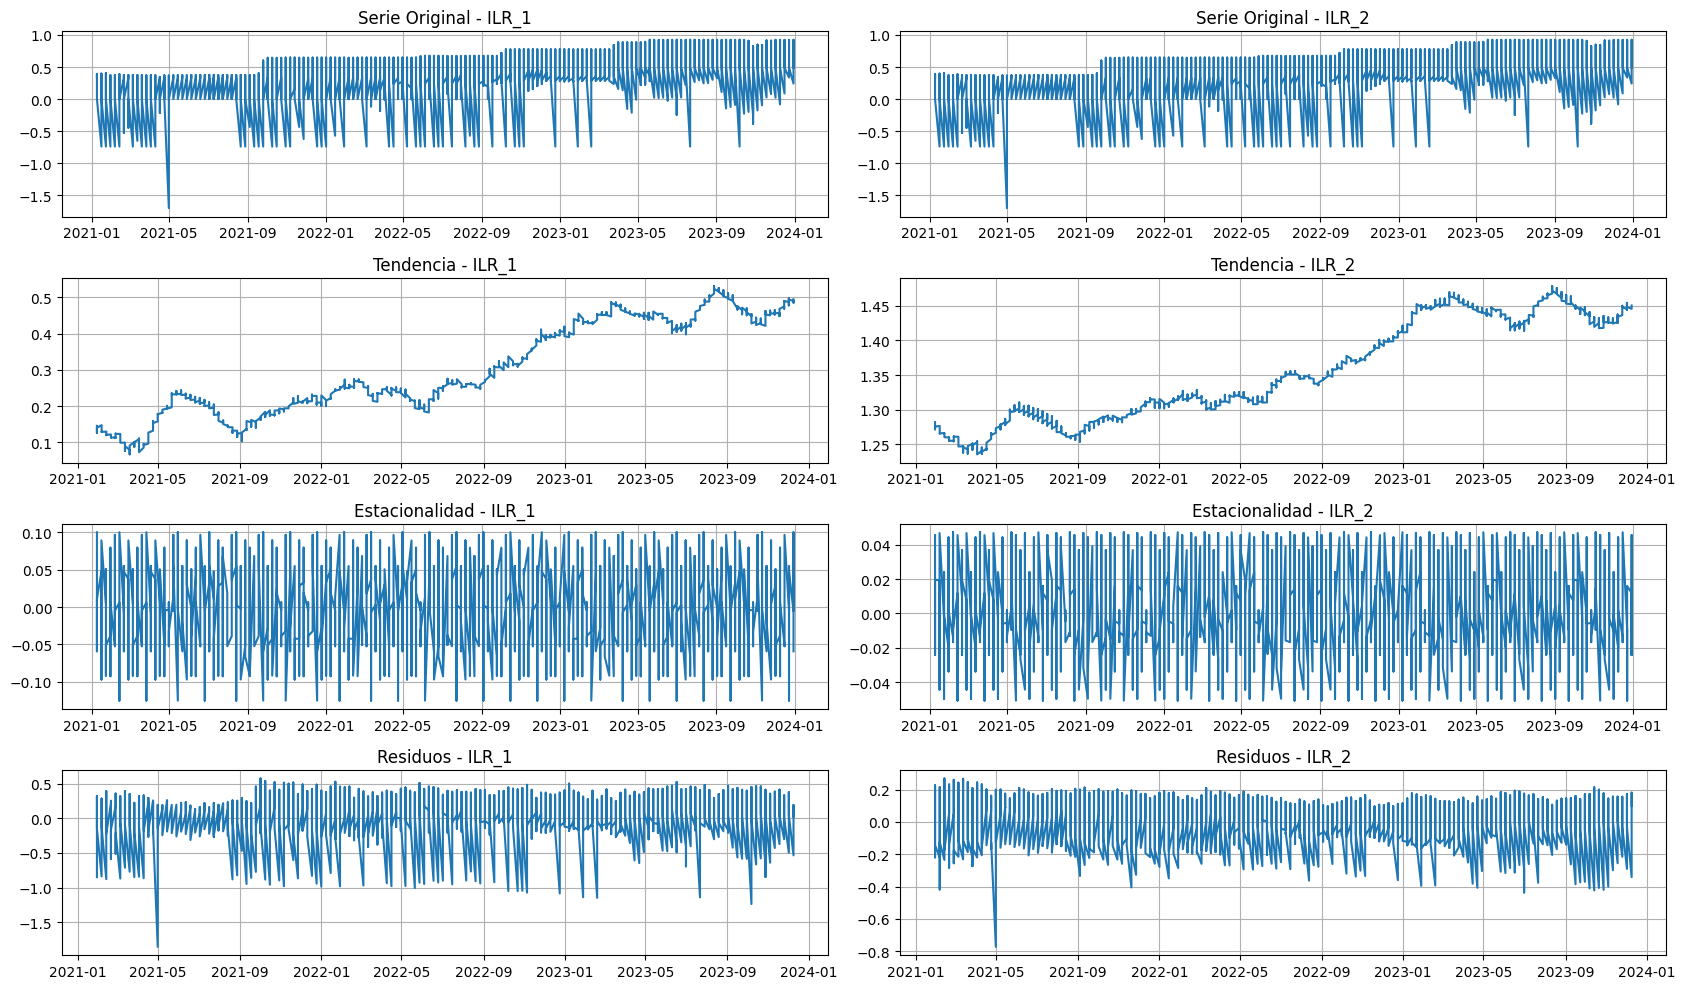

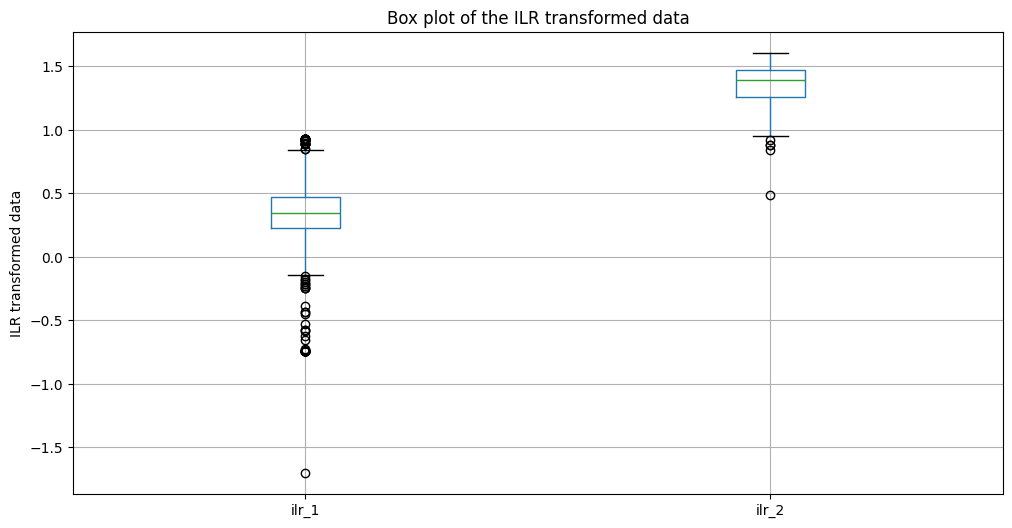

In [63]:
# %matplotlib widget
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición aditiva con los data_ilr interpolados
decomposition_add_ilr_1 = seasonal_decompose(
    data_filtered["ilr_1"], model="additive", period=52
)
decomposition_add_ilr_2 = seasonal_decompose(
    data_filtered["ilr_2"], model="additive", period=52
)

fig, ax = plt.subplots(4, 2, figsize=(17, 10))

ax[0, 0].plot(decomposition_add_ilr_1.observed)
ax[0, 0].set_title("Serie Original - ILR_1")
ax[0, 0].grid(True)

ax[1, 0].plot(decomposition_add_ilr_1.trend)
ax[1, 0].set_title("Tendencia - ILR_1")
ax[1, 0].grid(True)

ax[2, 0].plot(decomposition_add_ilr_1.seasonal)
ax[2, 0].set_title("Estacionalidad - ILR_1")
ax[2, 0].grid(True)

ax[3, 0].plot(decomposition_add_ilr_1.resid)
ax[3, 0].set_title("Residuos - ILR_1")
ax[3, 0].grid(True)

ax[0, 1].plot(decomposition_add_ilr_1.observed)
ax[0, 1].set_title("Serie Original - ILR_2")
ax[0, 1].grid(True)

ax[1, 1].plot(decomposition_add_ilr_2.trend)
ax[1, 1].set_title("Tendencia - ILR_2")
ax[1, 1].grid(True)

ax[2, 1].plot(decomposition_add_ilr_2.seasonal)
ax[2, 1].set_title("Estacionalidad - ILR_2")
ax[2, 1].grid(True)

ax[3, 1].plot(decomposition_add_ilr_2.resid)
ax[3, 1].set_title("Residuos - ILR_2")
ax[3, 1].grid(True)

plt.tight_layout()
plt.show()

# box plot of the ilr transformed data
plt.figure(figsize=(12, 6))
data_filtered[ilr_columns].boxplot()
plt.ylabel("ILR transformed data")
plt.title("Box plot of the ILR transformed data")
plt.grid(True)
plt.show()